# 사이킷런의 표준화, 정규화 기능 알아보기
---
파이썬(Python)에서 기계학습 모델을 이용할 때, 거의 모든 예제는 피쳐 스케일링(Feature Scaling)이라는 방법을 이용해서 데이터를 전처리합니다. 피쳐 스케일링이란 데이터의 분포를 조절하는 과정인데요, 자주 쓰이는 방식으로 나눠보자면 Standard Scaling과 Min-Max Scaling이 있습니다.
</p></br></br>

* Standard Scaling: 평균값을 0으로 대체한 뒤, 단위 표준편차에 맞게 분포를 조절합니다. 다른 말로는, 표준화(Standardization)라고도 부릅니다.
* Min-Max Scaling: 특정 범위(주로 0\~1) 내에서 표현되도록 분포를 조절합니다. 다른 말로는, 정규화(Normalization) 라고도 부릅니다.
</p></br></br>

이번에는 사이킷런(scikit-learn)에서 제공하는 `sklearn.preprocessing.StandardScaler` 및 `sklearn.preprocessing.MinMaxScaler`를 이용해서 표준화 및 정규화를 시도해 보도록 하겠습니다.
</p></br></br>

## 표준화
---
사이킷런은 추상화가 잘 되어 있는 패키지이기 때문에, 거의 모든 기능의 이용법이 같습니다. `sklearn.preprocessing.StandardScaler` 또한 마찬가지이므로, 다른 기능과 같이 `fit()`, `transform()` 정도만 외워둔다면 어려움 없이 데이터 전처리가 가능합니다.
</p></br></br>


In [8]:
# import package
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns

# input data
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [2]:
# statistical information
pd.DataFrame(
    [iris_df.mean(), iris_df.var(), iris_df.min(), iris_df.max()],
    index=["평균", "분산", "최솟값", "최댓값"],
)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
평균,5.843333,3.057333,3.758000,1.199333
분산,0.685694,0.189979,3.116278,0.581006
최솟값,4.300000,2.000000,1.000000,0.100000
최댓값,7.900000,4.400000,6.900000,2.500000


</p></br></br>

위와 같이 iris 데이터를 불러온 다음, `sklearn.preprocessing.StandardScaler`로 데이터 표준화를 수행해 보겠습니다.
</p></br></br>


In [4]:
from sklearn.preprocessing import StandardScaler

# StandardScaler
scaler = StandardScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_scaled_df = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
iris_scaled_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [5]:
# statistical information
pd.DataFrame(
    [
        iris_scaled_df.mean(),
        iris_scaled_df.var(),
        iris_scaled_df.min(),
        iris_scaled_df.max(),
    ],
    index=["평균", "분산", "최솟값", "최댓값"],
)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
평균,-1.690315e-15,-1.842970e-15,-1.698641e-15,-1.409243e-15
분산,1.006711e+00,1.006711e+00,1.006711e+00,1.006711e+00
최솟값,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
최댓값,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


</p></br></br>

변환된 데이터를 살펴보면, 평균과 분산이 변경된 것을 확인할 수 있습니다. 평균의 경우 거의 0에 가까운 값으로 조절되어 있으며, 분산은 거의 1에 가까운 값으로 조절되었습니다. 해당 특성은 정규분포와 일치하기 때문에, 정규분포를 요구하는 통계 분석 및 기계학습 모델에 데이터를 입력하기 전 전처리 과정으로 흔히 이용되고 있습니다.
</p></br></br>

## 정규화
---
정규화 또한 사이킷런에서 지원하고 있는데요, `sklearn.preprocessing.MinMaxScaler`라는 이름으로 제공되고 있습니다. 사용법은 StandardScaler와 같이 `fit()`, `transform()` 함수로 구현할 수 있어 편의성이 뛰어납니다.
</p></br></br>


In [6]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_scaled_df = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
iris_scaled_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [7]:
# statistical information
pd.DataFrame(
    [
        iris_scaled_df.mean(),
        iris_scaled_df.var(),
        iris_scaled_df.min(),
        iris_scaled_df.max(),
    ],
    index=["평균", "분산", "최솟값", "최댓값"],
)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
평균,0.428704,0.440556,0.467458,0.458056
분산,0.052908,0.032983,0.089522,0.100869
최솟값,0.000000,0.000000,0.000000,0.000000
최댓값,1.000000,1.000000,1.000000,1.000000


</p></br></br>

변환된 데이터를 살펴보면, 최솟값과 최댓값이 변경된 것을 확인할 수 있습니다. 정규화를 거친 데이터는 모든 데이터가 0\~1 사이의 범위에서 표현이 가능하기 때문에, 데이터의 값 차이를 기준으로 중요도를 계산하는 기계학습 모델에서 지나친 영향력이 발생하는 문제를 해결할 수 있습니다.
</br>
단, 평균과 분산은 원본에 비해서 거의 일정한 비율로 증감한 것을 확인할 수 있습니다. 이는 데이터 특성 자체는 유지한 상태로 값의 범위만 조절되었다는 뜻으로, 데이터의 분포를 조절해야 하는 상황이라면 Min-Max Scaling은 적합하지 않다는걸 알 수 있습니다.

시각화

C:\Users\user\AppData\Local\Temp\ipykernel_18064\3475114958.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=iris_df['sepal length (cm)'])


<Axes: ylabel='Density'>

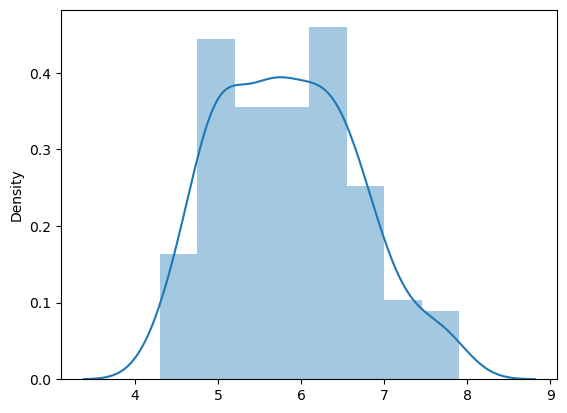

In [11]:
sns.distplot(x=iris_df["sepal length (cm)"])

C:\Users\user\AppData\Local\Temp\ipykernel_18064\4027555782.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(iris_scaled_df['sepal length (cm)'])


<Axes: xlabel='sepal length (cm)', ylabel='Density'>

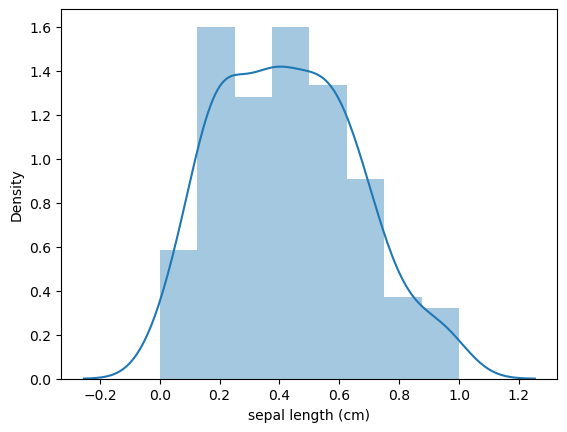

In [12]:
sns.distplot(iris_scaled_df["sepal length (cm)"])